In [ ]:
!pip install transformers

     |████████████████████████████████| 2.5MB 27.5MB/s 
     |████████████████████████████████| 901kB 45.8MB/s 
     |████████████████████████████████| 3.3MB 45.5MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/LCT/Language Technology Project/LTP Project')

Mounted at /content/drive


In [ ]:
# reads csv file for train
df = pd.read_csv('train.csv', encoding='utf-8')
# rename columns
df.columns = ["id", "text", "label"]

# print(df)

In [ ]:
# prints distribution of labels in train
print(df['label'].value_counts())

0    9209
1    4200
Name: label, dtype: int64


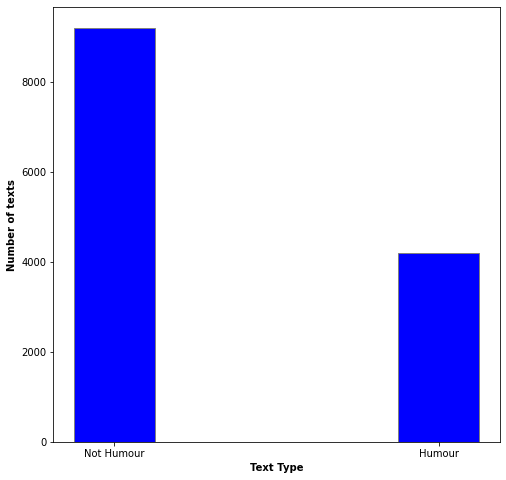

In [ ]:
# create variables
nh_count = df['label'].value_counts()[0]
h_count = df['label'].value_counts()[1]

# for the plot
x = ["Not Humour", "Humour"]
y = [nh_count, h_count]

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize=(8, 8))

# Set position of bar on X axis
br1 = np.arange(len(x))

# Make the plot
plt.bar(br1, y, color='b', width=barWidth,
        edgecolor='grey')

# Adding Xticks
plt.xlabel('Text Type', fontweight='bold')
plt.ylabel('Number of texts', fontweight='bold')
plt.xticks([r for r in range(len(x))],
           ["Not Humour", "Humour"])

plt.show()

In [ ]:
# plot of train distribution vs dev distribution?
print(df['text'][0])

Look Before You Leap, But Having Leapt Never Look Back


In [ ]:
from transformers import PreTrainedTokenizer, BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# tokenizer2 = BertTokenizer.from_pretrained('bert-base-cased')


In [ ]:
# tokenize each sentence

tokens = []

for i in range(len(df['text'])):
  new_tokens = tokenizer.encode(text=df['text'][i])
  tokens.append(new_tokens)

print(tokens)

[[101, 2298, 2077, 2017, 11679, 1010, 2021, 2383, 13920, 2196, 2298, 2067, 102], [101, 1999, 1996, 5998, 1010, 1996, 2311, 11269, 2543, 1998, 1996, 8643, 10574, 1012, 102], [101, 1996, 2381, 3149, 1009, 1015, 1012, 2073, 2381, 17993, 2993, 1012, 102], [101, 2009, 2038, 1037, 4942, 7983, 12002, 5216, 1997, 2317, 7516, 3614, 2098, 2007, 2304, 1010, 1037, 11867, 7895, 15431, 3165, 2240, 2007, 2304, 7926, 1010, 1998, 2416, 10281, 1997, 2304, 20352, 1012, 102], [101, 5424, 1011, 5611, 2375, 12088, 6731, 2005, 3116, 2945, 1997, 2730, 21524, 102], [101, 4106, 1011, 7327, 5617, 4568, 6058, 4418, 2000, 2562, 3725, 1999, 102], [101, 2174, 1010, 2006, 2602, 2154, 2477, 2018, 2904, 1012, 102], [101, 2320, 1996, 2689, 2989, 2388, 1998, 1996, 2689, 2989, 2031, 11055, 1996, 2166, 2013, 1996, 2529, 2388, 1998, 2775, 1010, 1996, 2689, 2989, 1998, 2049, 2388, 4088, 2000, 3945, 2005, 1037, 2047, 7218, 2833, 3120, 1012, 102], [101, 8398, 4084, 2039, 4491, 2007, 1005, 12170, 13344, 1005, 1056, 28394, 2102,

In [ ]:
# calculate sentence length based on number of tokens
sentlen = []

for i in range(len(tokens)):
  length = len(tokens[i])
  sentlen.append(length)

print(sentlen)

[13, 15, 13, 34, 14, 13, 11, 38, 19, 9, 10, 19, 10, 19, 12, 31, 26, 9, 15, 12, 20, 74, 19, 18, 16, 38, 21, 16, 13, 24, 14, 21, 39, 22, 12, 13, 10, 28, 15, 20, 45, 12, 25, 11, 13, 33, 22, 27, 19, 27, 10, 26, 14, 14, 19, 16, 23, 50, 16, 14, 9, 47, 19, 22, 22, 18, 13, 13, 31, 23, 14, 8, 16, 20, 14, 16, 12, 19, 7, 24, 18, 21, 17, 15, 17, 12, 29, 23, 17, 11, 16, 17, 26, 19, 15, 15, 15, 21, 22, 15, 13, 26, 23, 16, 21, 23, 12, 7, 17, 17, 10, 12, 23, 10, 16, 12, 18, 24, 106, 16, 13, 12, 25, 21, 18, 22, 17, 14, 19, 9, 20, 34, 18, 36, 10, 20, 11, 11, 13, 19, 16, 23, 18, 31, 17, 10, 23, 18, 30, 17, 11, 32, 14, 21, 21, 12, 7, 28, 21, 17, 13, 21, 33, 17, 14, 22, 18, 38, 13, 23, 35, 13, 39, 13, 18, 18, 19, 31, 16, 14, 11, 14, 15, 17, 17, 19, 10, 14, 18, 13, 21, 15, 18, 27, 15, 27, 12, 14, 10, 19, 15, 16, 8, 13, 15, 17, 15, 18, 29, 18, 12, 16, 5, 11, 20, 7, 15, 18, 24, 15, 12, 29, 18, 22, 18, 19, 18, 45, 20, 8, 13, 11, 9, 10, 13, 38, 17, 16, 28, 25, 20, 18, 26, 12, 25, 11, 25, 20, 17, 9, 36, 13, 11, 

In [ ]:
# add a new column for sentence length
df['length'] = sentlen

print(df)

          id                                               text  label  length
0       4381  Look Before You Leap, But Having Leapt Never L...      0      13
1      11946  In the struggle , the building catches fire an...      0      15
2       1996  The History Channel +1. Where History repeats ...      1      13
3      10488  It has a subdorsal row of white spots ringed w...      0      34
4       5674  Arab-Israeli lawmakers suspended for meeting f...      0      14
...      ...                                                ...    ...     ...
13404   4286             He That Will Thrive, Must Rise At Five      0      11
13405  12069  Three of its number 1 hits , `` End of the Roa...      0      74
13406  11423  Born in 1048 CE and originating from Nisa , he...      0      32
13407  10610  However , stream ciphers can be susceptible to...      0      36
13408   7240  Proposals to keep Britain in EU unveiled, but ...      0      19

[13409 rows x 4 columns]


In [ ]:
print("Average sentence length:", df['length'].mean())

Average sentence length: 19.42493847415915


In [ ]:
df_nh = df[df["label"] == 0]
df_h = df[df["label"] == 1]

print("Average sentence length (non-humour):", df_nh['length'].mean())
print("Average sentence length (humour):",df_h['length'].mean())

Average sentence length (non-humour): 18.150070583125203
Average sentence length (humour): 22.220238095238095


In [ ]:
# investigating the distribution of sentence length
long_sents = df[df['length'] > 50]
middle_long_sents = df[df['length'] > 75]
very_long_sents = df[df['length'] > 100]
short_sents = df[df['length'] < 50]

print(len(df))
print(len(long_sents))
print(len(middle_long_sents))
print(len(very_long_sents))
print(len(short_sents))

13409
100
13
3
13299


In [ ]:
print("Minimum sentence length:", df['length'].min())
print("Maximum sentence length:", df['length'].max())

Minimum sentence length: 4
Maximum sentence length: 207


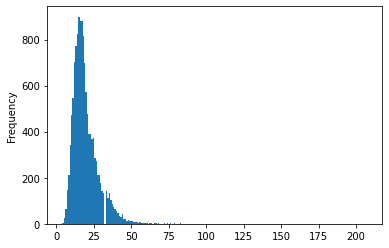

In [ ]:
# creating a histogram plot of the distribution of sentence lengths
df['length'].plot.hist(bins=210)

## Test set

In [ ]:
# reads csv file for test
test = pd.read_csv('test.csv', encoding='utf-8')
# rename columns
test.columns = ["id", "text", "label"]

# print(df)

In [ ]:
# prints distribution of labels in
print(test['label'].value_counts())

0    2304
1    1051
Name: label, dtype: int64


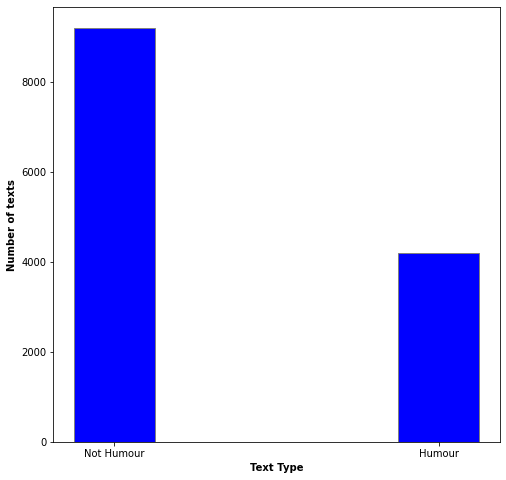

In [ ]:
# create variables
nh_count_test = test['label'].value_counts()[0]
h_count_test = test['label'].value_counts()[1]

# for the plot
xt = ["Not Humour", "Humour"]
yt = [nh_count, h_count]

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize=(8, 8))

# Set position of bar on X axis
br2 = np.arange(len(xt))

# Make the plot
plt.bar(br2, yt, color='b', width=barWidth,
        edgecolor='grey')

# Adding Xticks
plt.xlabel('Text Type', fontweight='bold')
plt.ylabel('Number of texts', fontweight='bold')
plt.xticks([r for r in range(len(xt))],
           ["Not Humour", "Humour"])

plt.show()

In [ ]:
# tokenize the test set

test_tokens = []

for i in range(len(test['text'])):
  new_tokens = tokenizer.encode(text=test['text'][i])
  test_tokens.append(new_tokens)

print(test_tokens)

[[101, 2014, 2034, 2981, 2537, 2001, 11719, 1998, 4409, 1010, 1037, 6298, 4038, 2055, 2048, 2814, 2040, 2175, 2000, 5869, 7136, 2000, 2424, 2995, 2293, 1012, 102], [101, 22072, 2758, 2002, 4122, 3795, 6792, 2114, 10130, 1024, 12170, 6392, 102], [101, 2023, 23561, 2573, 2471, 3599, 2066, 1010, 2156, 2045, 1012, 102], [101, 13587, 3514, 9466, 1999, 6209, 1011, 27570, 3119, 102], [101, 2660, 2856, 4584, 2129, 2000, 4769, 6583, 14129, 2916, 5936, 1010, 5491, 2265, 102], [101, 3784, 7125, 10470, 8704, 2000, 6073, 2039, 1057, 1012, 1055, 1012, 6240, 3006, 102], [101, 9960, 5920, 9472, 3133, 4977, 2004, 1037, 20731, 1024, 5037, 7610, 102], [101, 2087, 2137, 2317, 2273, 2024, 4738, 2000, 2022, 6904, 5620, 1012, 102], [101, 2651, 1045, 2253, 2000, 11848, 2302, 2026, 3042, 1012, 2045, 1005, 1055, 19289, 13262, 1999, 1996, 5723, 1012, 102], [101, 1045, 3786, 1037, 2304, 5583, 2012, 16894, 1012, 2026, 2279, 12932, 2003, 1037, 2665, 28407, 1012, 102], [101, 5148, 7610, 2041, 1997, 18974, 1999, 2283

In [ ]:
# sentence lengths for the test set

testsentlen = []

for i in range(len(test_tokens)):
  length = len(test_tokens[i])
  testsentlen.append(length)

print(testsentlen)

[27, 13, 12, 10, 15, 15, 13, 13, 20, 18, 15, 13, 16, 12, 18, 19, 16, 16, 17, 16, 11, 18, 14, 17, 19, 10, 14, 18, 13, 18, 20, 6, 96, 30, 12, 28, 18, 35, 43, 12, 14, 13, 9, 16, 15, 27, 20, 14, 13, 23, 13, 12, 17, 19, 14, 10, 19, 24, 15, 13, 11, 29, 29, 17, 24, 8, 18, 29, 18, 13, 11, 18, 15, 21, 15, 35, 11, 21, 14, 11, 99, 61, 19, 13, 12, 25, 18, 20, 13, 14, 34, 16, 33, 13, 14, 17, 11, 36, 12, 23, 15, 17, 9, 38, 11, 19, 13, 33, 19, 13, 31, 15, 19, 17, 10, 21, 13, 16, 17, 19, 21, 26, 24, 29, 24, 22, 13, 32, 11, 17, 17, 27, 13, 31, 15, 7, 9, 13, 38, 38, 16, 35, 19, 14, 42, 28, 25, 13, 71, 7, 12, 15, 49, 20, 13, 16, 12, 18, 10, 21, 32, 24, 20, 15, 19, 19, 20, 15, 18, 22, 30, 14, 33, 29, 15, 10, 22, 22, 30, 10, 20, 39, 30, 35, 25, 16, 30, 12, 18, 14, 10, 13, 9, 15, 9, 15, 28, 11, 17, 21, 24, 16, 18, 14, 21, 14, 13, 12, 15, 15, 14, 20, 20, 30, 13, 19, 24, 28, 18, 13, 11, 32, 24, 33, 14, 36, 15, 12, 18, 11, 22, 15, 17, 21, 17, 16, 32, 11, 29, 10, 26, 15, 17, 11, 19, 17, 13, 33, 45, 18, 14, 13, 

In [ ]:
# create a new column for sentence length
test['length'] = testsentlen

print(test)

        id                                               text  label  length
0     2354  Her first independent production was Diamonds ...      0      27
1     2046  Putin says he wants global cooperation against...      0      13
2     2449  This template works almost exactly like , see ...      0      12
3     1871     Crude oil rises in holiday-constrained trade        0      10
4     1554  Australia directed officials how to address Na...      0      15
...    ...                                                ...    ...     ...
3350  2072  China central bank intervening to support yuan...      0      16
3351   190  Sometimes I put my head between my legs and le...      1      22
3352  3231  Anquetil won all three of the Grand Tours - th...      0      20
3353  2418  An acre is an area that is one furlong long an...      0      18
3354  3144  He had been speaking and writing of his own de...      0      33

[3355 rows x 4 columns]


In [ ]:
print("Average sentence length:", test['length'].mean())

test_nh = test[test["label"] == 0]
test_h = test[test["label"] == 1]

print("Average sentence length (non-humour):", test_nh['length'].mean())
print("Average sentence length (humour):",test_h['length'].mean())

Average sentence length: 19.25245901639344
Average sentence length (non-humour): 17.967881944444443
Average sentence length (humour): 22.06850618458611


In [ ]:
# investigate the distribution of the sentence lengths

test_long_sents = test[test['length'] > 50]
test_middle_long_sents = test[test['length'] > 75]
test_very_long_sents = test[test['length'] > 100]
test_short_sents = test[test['length'] < 50]

print(len(test))
print(len(test_long_sents))
print(len(test_middle_long_sents))
print(len(test_very_long_sents))
print(len(test_short_sents))

3355
26
4
0
3326


In [ ]:
print("Minimum sentence length:", test['length'].min())
print("Maximum sentence length:", test['length'].max())

Minimum sentence length: 5
Maximum sentence length: 99


## Data sources

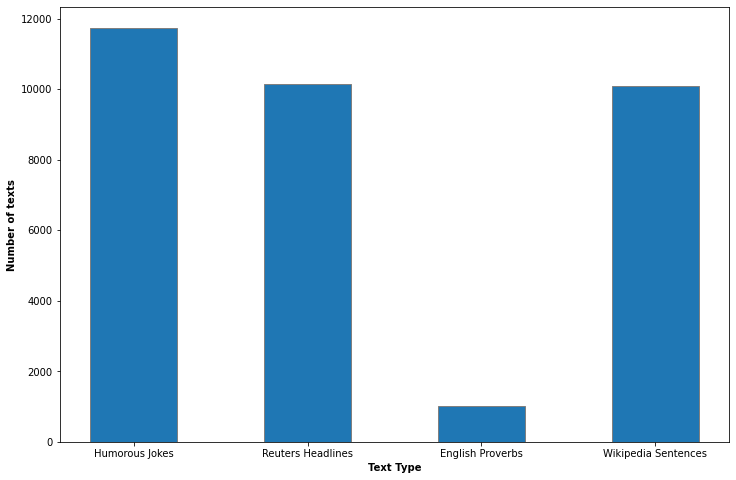

In [ ]:


sources = ["Humorous Jokes", "Reuters Headlines", "English Proverbs", "Wikipedia Sentences"]
numbers = [11743, 10142, 1019, 10076 ] 

# set width of bar
barWidth = 0.50
fig = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(sources))

# Make the plot
plt.bar(br1, numbers, width=barWidth,
        edgecolor='grey')

# Adding Xticks
plt.xlabel('Text Type', fontweight='bold')
plt.ylabel('Number of texts', fontweight='bold')
plt.xticks([r for r in range(len(sources))],
           ["Humorous Jokes", "Reuters Headlines", "English Proverbs", "Wikipedia Sentences"])

plt.show()

In [ ]:
# distribution in percentage
nums = pd.DataFrame(numbers)
nums.sum()
nums_per = nums/nums.sum()

print(nums_per)

          0
0  0.356064
1  0.307520
2  0.030898
3  0.305518
